# 데이터 세트 로딩

In [60]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

cancer = load_breast_cancer()

data = cancer.data
target = cancer.target
feature_names = cancer.feature_names

# 데이터 프레임 생성
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = target

df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [33]:
# 모델 생성 목적을 암을 예측하기 위해서 만들 것이라서 종양을 0으로, 암을 1로 바꿔주기
tumor = df.loc[df['target'] == 1].copy() # 얕은 복사 , copy를 안하고 하면 원본 바뀜
cancer = df.loc[df['target'] == 0].copy()

tumor['target'] = 0
cancer['target'] = 1

sample = pd.concat([tumor, cancer[:30]], sort=True)

sample['target'].value_counts()

0    357
1     30
Name: target, dtype: int64

# 데이터 분할

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(
    sample.drop("target", axis=1),
    sample["target"],
    random_state=42
)

# 모델 정의 및 학습

In [35]:
from sklearn.linear_model import LogisticRegression # 0,1 중 확률이 높은 것을 반환

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

lr_pred = model.predict(X_test)

# 정확도(Accuracy) 확인

## 모델 예측 정확도 확인

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred)

## 잘못된 예측의 정확도 확인
- 돌팔이 의사가 암인 사람도 어차피 많이 없는데 그냥 다 종양이라고 해볼까?

In [37]:
dolpal_pred = np.zeros(shape=y_test.shape)
dolpal_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
accuracy_score(y_test,dolpal_pred)

0.9072164948453608

정확도만 보고 분류기의 성능을 판단하는 것은 매우 위험하다!

# 오차 행렬(혼동 행렬-Confusion Matrix)

In [39]:
from sklearn.metrics import confusion_matrix

# LogisticRegression의 혼동행렬
lr_conf_matrix = confusion_matrix(y_test , lr_pred)
print("모델의 오차 행렬 : \n{}".format(lr_conf_matrix))

모델의 오차 행렬 : 
[[87  1]
 [ 2  7]]


In [40]:
# 돌팔이의 혼동행렬
dolpal_conf_matrix = confusion_matrix(y_test, dolpal_pred)
print("돌팔이의 오차 행렬: \n{}".format(dolpal_conf_matrix))

돌팔이의 오차 행렬: 
[[88  0]
 [ 9  0]]


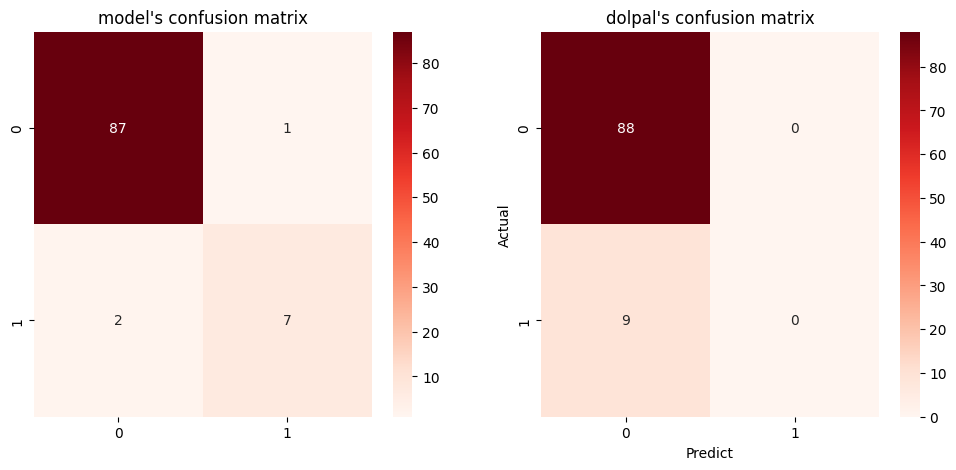

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(121)
ax = sns.heatmap(
    lr_conf_matrix,
    annot=True,
    cmap="Reds"
)
ax.set_title("model's confusion matrix")

plt.subplot(122)
ax = sns.heatmap(
    dolpal_conf_matrix,
    annot=True,
    cmap="Reds",
)

ax.set_title("dolpal's confusion matrix")

plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

# 정밀도, 재현율 확인
- 정밀도 : TP / (FP + TP)
  - 양성(Positive)로 예측을 했을 떄, 실제 맞은 비율
- 재현율 : TP / (FN + TP)
  - 실제 양성(Positive)인 데이터를 맞춘 비율

In [42]:
# 모델의 정밀도, 재현율
from sklearn.metrics import precision_score, recall_score
print("정밀도 : {:.3f}".format(precision_score(y_test, lr_pred)))
print("재현율 : {:.3f}".format(recall_score(y_test, lr_pred)))

정밀도 : 0.875
재현율 : 0.778


In [43]:
# 돌팔이의 정밀도, 재현율
from sklearn.metrics import precision_score, recall_score
print("정밀도 : {:.3f}".format(precision_score(y_test, dolpal_pred)))
print("재현율 : {:.3f}".format(recall_score(y_test, dolpal_pred)))

정밀도 : 0.000
재현율 : 0.000


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


정확도(Accuracy_score)는 설명할 때만 사용(외부설명)  
정밀도, 재현율은 내부지표(개발자 사이)

# 정밀도 - 재현율 트레이드 오프

In [44]:
# pred_proba : 각 클래스에 대한 예측 확률 확인. [0확률, 1확률]
lr_pred_proba = model.predict_proba(X_test) # 예측 확률
lr_pred       = model.predict(X_test) #예측 결과

print(lr_pred_proba[:3])
print()
print(lr_pred[:3])

[[9.99263508e-01 7.36491915e-04]
 [9.99303414e-01 6.96586175e-04]
 [9.99999986e-01 1.40395416e-08]]

[0 0 0]


기본적인 predict_proba는 threshold가 0.5

# Binarizer 클래스 사용하기
- 지정한 threshold보다 작으면 0으로, 크면 1로 분류해주는 클래스

In [45]:
from sklearn.preprocessing import Binarizer

In [46]:
# 예시
sample_data = [[0.1, 0.7],
               [1.1, 0.2],
               [0.3, 1.2]]

binarizer = Binarizer(threshold = 0.8)
binarizer.fit_transform(sample_data)

array([[0., 0.],
       [1., 0.],
       [0., 1.]])

In [47]:
arr= np.array([[1,2],
              [3,4],
              [5,6]])
arr[:2][1]
arr[:,1]
            

array([2, 4, 6])

In [ ]:
# 임계값이 0.5(기본)일 때 오차 행렬 확인
lr_pred_proba_1 = model.predict_proba(X_test)[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = 0.5)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)
custom_predict

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred, ax=None):
  confusion = confusion_matrix( y_test, pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  accuracy = accuracy_score(y_test, pred)
  hmap_ax = sns.heatmap(
    confusion,
    annot=True,
    cmap="Reds",
    ax=ax #
  )
  hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}, R: {2:.4f}'.format(accuracy , precision ,recall))

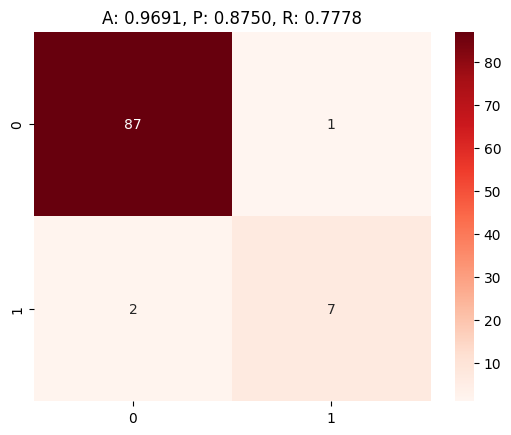

In [50]:
get_clf_eval(y_test, custom_predict)

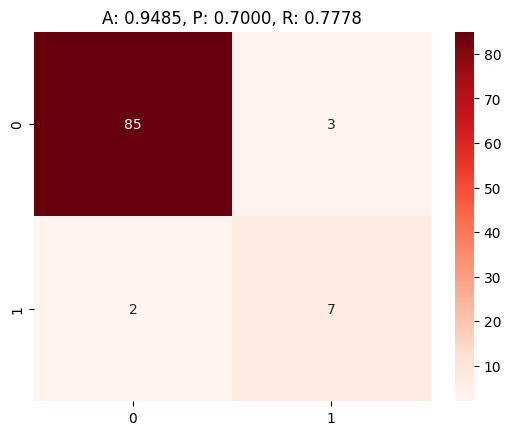

In [52]:
# 임계값 = 0.1
binarizer = Binarizer(threshold = 0.1)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)

get_clf_eval(y_test, custom_predict)

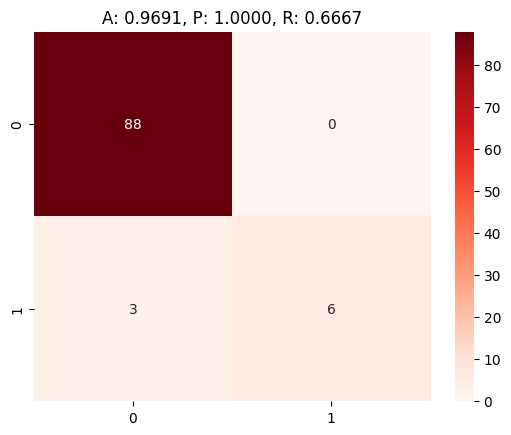

In [53]:
# 임계값 = 0.8
binarizer = Binarizer(threshold = 0.8)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)

get_clf_eval(y_test, custom_predict)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


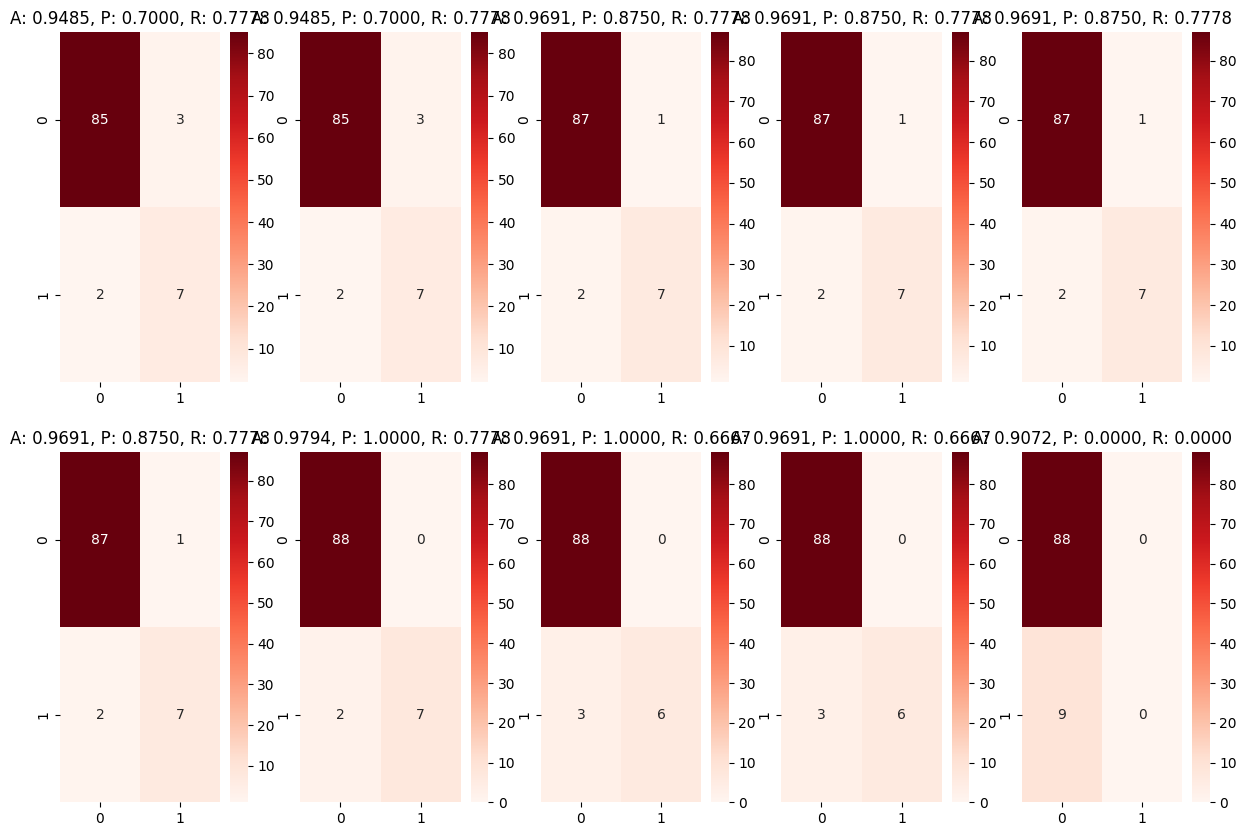

In [63]:
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    fig, axes = plt.subplots(nrows=2, ncols=5) # ax는 x,y자료를 지니고 있는 수형집합
    fig.set_figwidth(15)
    fig.set_figheight(10)
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold, ax in zip(thresholds, axes.ravel()# flatten이랑 유사):
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)

        custom_predict = binarizer.transform(pred_proba)
        get_clf_eval(y_test, custom_predict, ax)
        
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
get_eval_by_threshold(y_test, lr_pred_proba_1, thresholds )

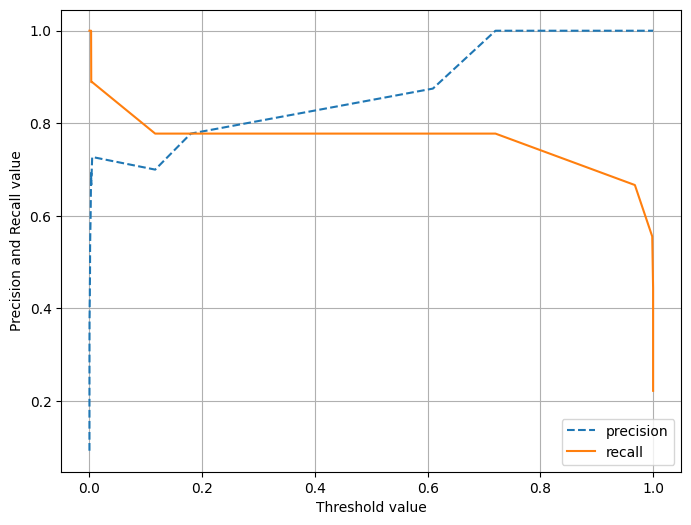

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] # (96,)
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, model.predict_proba(X_test)[:, 1] )

In [97]:
precisions, recalls, thresholds = precision_recall_curve( y_test, model.predict_proba(X_test)[:, 1])



In [98]:
thresholds.shape

(96,)

In [99]:
recalls.shape

(97,)

In [102]:
precisions.shape

(97,)

# F1 Score

In [56]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, lr_pred)
f1

0.823529411764706

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


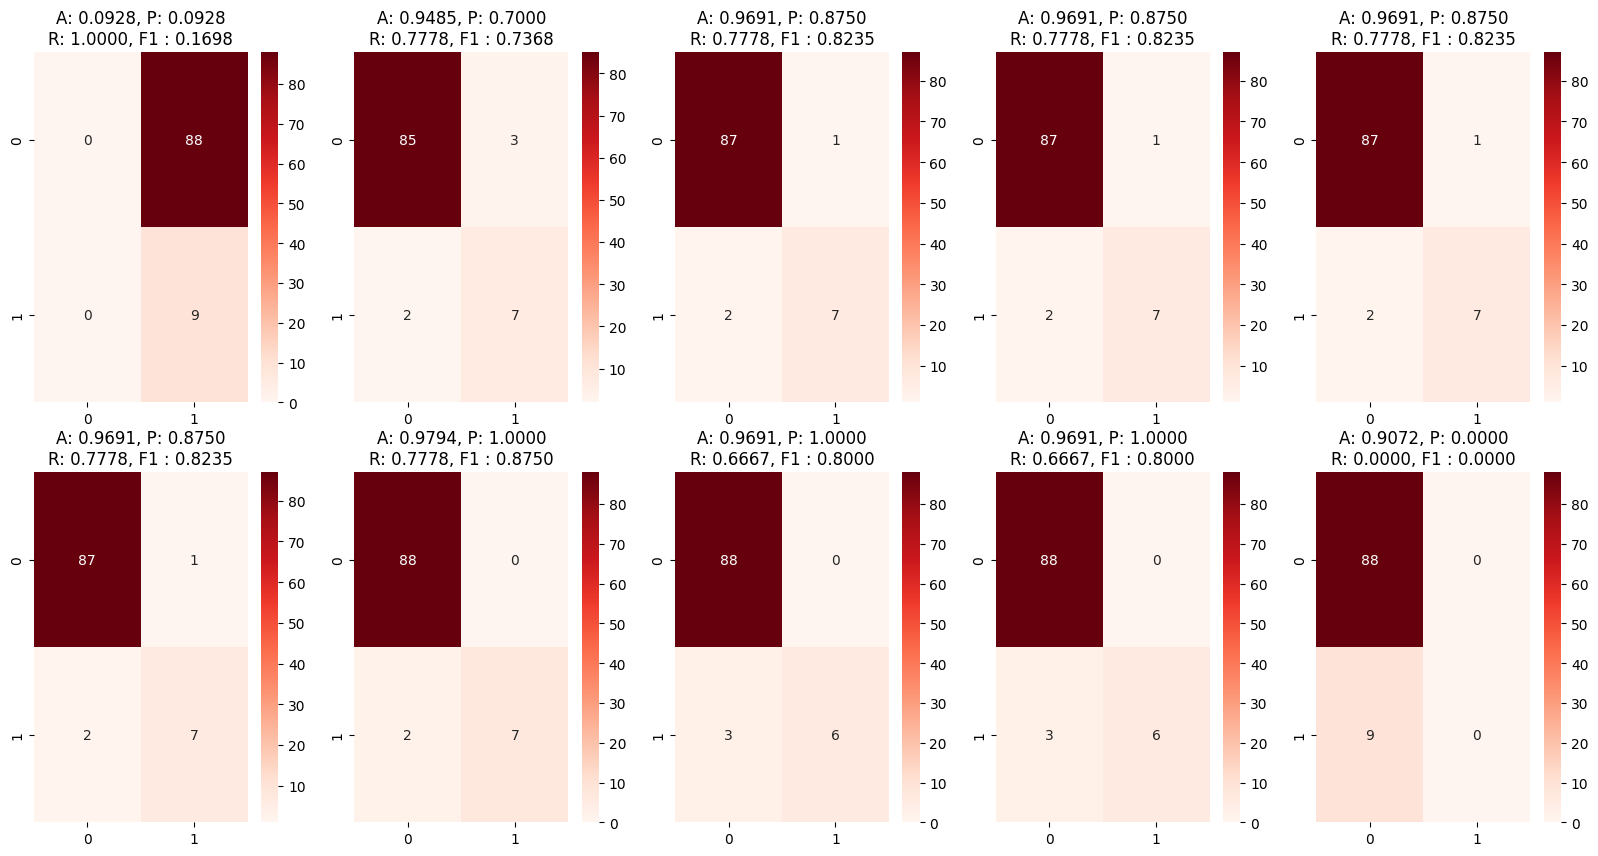

In [57]:
def get_clf_eval(y_test, pred, ax=None):
  confusion = confusion_matrix( y_test, pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  hmap_ax = sns.heatmap(
    confusion,
    annot=True,
    cmap="Reds",
    ax=ax
  )
  
  hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}\nR: {2:.4f}, F1 : {3:.4f}'.format(accuracy , precision ,recall, f1))
  
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
pred_proba = model.predict_proba(X_test)
get_eval_by_threshold(y_test, lr_pred_proba_1, thresholds)

ROC AUC

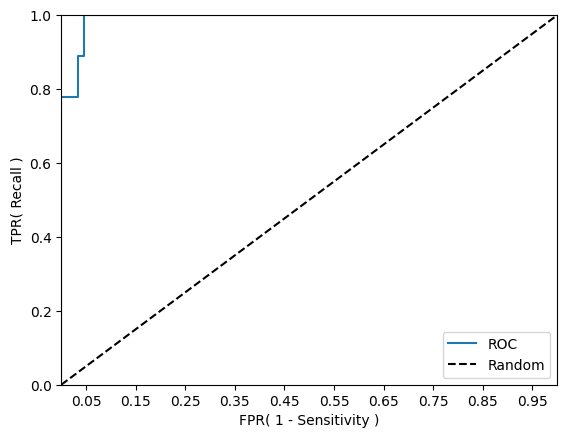

In [58]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, model.predict_proba(X_test)[:, 1] )

In [59]:
from sklearn.metrics import roc_auc_score

pred_proba = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9912


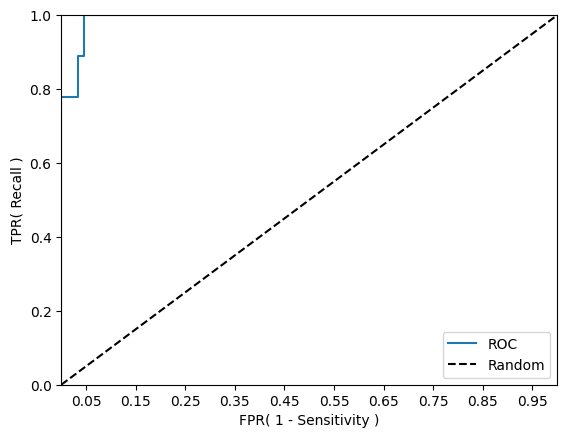

In [89]:
 fprs , tprs , thresholds = roc_curve(y_test ,model.predict_proba(X_test)[:, 1])

# ROC Curve를 plot 곡선으로 그림. 
plt.plot(fprs , tprs, label='ROC')
# 가운데 대각선 직선을 그림. 
plt.plot([0, 1], [0, 1], 'k--', label='Random')
      
# FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
plt.legend()
plt.show()

In [90]:
start

-0.05

In [91]:
end

1.05

In [92]:
fprs

array([0.        , 0.        , 0.        , 0.03409091, 0.03409091,
       0.04545455, 0.04545455, 1.        ])

In [93]:
tprs

array([0.        , 0.22222222, 0.77777778, 0.77777778, 0.88888889,
       0.88888889, 1.        , 1.        ])

In [94]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 7.20351173e-01, 1.16571694e-01,
       4.84622371e-03, 3.15740650e-03, 2.89085417e-03, 4.00842811e-16])